In [1]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import re

In [2]:
endsars = pd.read_excel(r'C:\Users\ADESOBA OLAMIDE\Desktop\endsars.xlsx')

lis = []
for row in endsars['Text']:
    length = len(row)
    lis.append(length)
    
endsars['len_tweet'] = lis

endsars.head()

,Datetime,Tweet Id,Text,Username,location,verified,created,retweet,likes,len_tweet
0,2020-12-30 23:59:39+00:00,1344432997957850112,"@DannyWalta In 2020, politicians in Nig almost...",LeagueofCitize1,Nigeria,False,2020-11-30 09:20:55+00:00,1,0,328
1,2020-12-30 23:59:36+00:00,1344432982896110080,31-12-2020 Rounding Upâ€¦ \n\n1-1-2021 Loading...,Mc_Hugo92,"Lagos, Nigeria",False,2011-05-24 02:29:46+00:00,1,1,238
2,2020-12-30 23:59:11+00:00,1344432881486139904,#EndSARS,JarrodB19_,"Michigan, USA",False,2009-05-01 20:20:36+00:00,2,2,8
3,2020-12-30 23:59:11+00:00,1344432877975559936,"@viralpostsng In 2020, politicians in Nig almo...",LeagueofCitize1,Nigeria,False,2020-11-30 09:20:55+00:00,1,0,331
4,2020-12-30 23:58:46+00:00,1344432775747820032,"@Harryolah In 2020, politicians in Nig almost ...",LeagueofCitize1,Nigeria,False,2020-11-30 09:20:55+00:00,1,1,328


In [3]:
endsars =endsars.fillna('unknown location')
endsars

,Datetime,Tweet Id,Text,Username,location,verified,created,retweet,likes,len_tweet
0,2020-12-30 23:59:39+00:00,1344432997957850112,"@DannyWalta In 2020, politicians in Nig almost...",LeagueofCitize1,Nigeria,False,2020-11-30 09:20:55+00:00,1,0,328
1,2020-12-30 23:59:36+00:00,1344432982896110080,31-12-2020 Rounding Upâ€¦ \n\n1-1-2021 Loading...,Mc_Hugo92,"Lagos, Nigeria",False,2011-05-24 02:29:46+00:00,1,1,238
2,2020-12-30 23:59:11+00:00,1344432881486139904,#EndSARS,JarrodB19_,"Michigan, USA",False,2009-05-01 20:20:36+00:00,2,2,8
3,2020-12-30 23:59:11+00:00,1344432877975559936,"@viralpostsng In 2020, politicians in Nig almo...",LeagueofCitize1,Nigeria,False,2020-11-30 09:20:55+00:00,1,0,331
4,2020-12-30 23:58:46+00:00,1344432775747820032,"@Harryolah In 2020, politicians in Nig almost ...",LeagueofCitize1,Nigeria,False,2020-11-30 09:20:55+00:00,1,1,328
...,...,...,...,...,...,...,...,...,...,...
131925,2020-06-03 19:06:36+00:00,1268257796413400064,@AsiwajuLerry #saynotorape\n#EndSARS,hoskar5,"oyo state, ibadan.",False,2013-07-01 07:47:41+00:00,0,0,35
131926,2020-06-03 19:01:47+00:00,1268256585853400064,"This whole Somto false accusation, and now Dba...",I_Stan_EndSARS,King's Landing,False,2010-11-15 07:00:32+00:00,0,1,279
131927,2020-06-03 18:24:13+00:00,1268247130575109888,We are tired of all this Hash tags.. #SayNoToR...,echadafrica,Africa,False,2020-04-21 15:31:47+00:00,1,2,300
131928,2020-06-03 18:08:59+00:00,1268243295504920064,@054durin @Mayokeezybeatz @funshographix @Mayo...,_ENDSARS,Nigeria,False,2019-08-20 07:34:31+00:00,0,0,56


In [4]:
endsars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Datetime   131930 non-null  object
 1   Tweet Id   131930 non-null  int64 
 2   Text       131930 non-null  object
 3   Username   131930 non-null  object
 4   location   131930 non-null  object
 5   verified   131930 non-null  bool  
 6   created    131930 non-null  object
 7   retweet    131930 non-null  int64 
 8   likes      131930 non-null  int64 
 9   len_tweet  131930 non-null  int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 9.2+ MB


In [5]:
endsars.describe()

,Tweet Id,retweet,likes,len_tweet
count,1.319300e+05,131930.000000,131930.000000,131930.000000
mean,1.315925e+18,8.314386,10.789851,143.562965
std,1.401305e+16,304.006004,353.579127,111.988757
min,1.268237e+18,0.000000,0.000000,4.000000
25%,1.314697e+18,0.000000,0.000000,58.000000
50%,1.318320e+18,0.000000,0.000000,117.000000
75%,1.322157e+18,1.000000,1.000000,218.000000
max,1.344433e+18,59744.000000,66466.000000,1626.000000


In [6]:
outlier = endsars[endsars['likes'] == max(endsars['likes'])]
outlier

,Datetime,Tweet Id,Text,Username,location,verified,created,retweet,likes,len_tweet
95642,2020-10-19 22:37:23+00:00,1318320367413459968,Our movement started peacefully and has remain...,falzthebahdguy,Lagos Nigeria,True,2009-07-20 12:53:26+00:00,59744,66466,150


In [7]:
outlier2 = endsars[endsars['retweet'] == max(endsars['retweet'])]
outlier2

,Datetime,Tweet Id,Text,Username,location,verified,created,retweet,likes,len_tweet
95642,2020-10-19 22:37:23+00:00,1318320367413459968,Our movement started peacefully and has remain...,falzthebahdguy,Lagos Nigeria,True,2009-07-20 12:53:26+00:00,59744,66466,150


<AxesSubplot:>

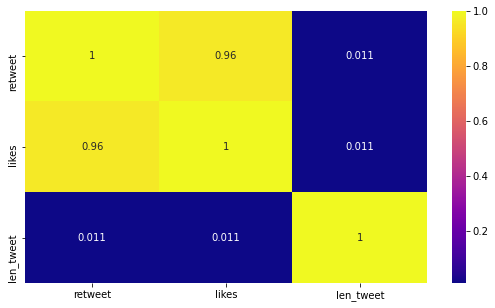

In [8]:
variables = ['retweet','likes','len_tweet']
plt.figure(figsize=(9,5))
sns.heatmap(endsars[variables].corr(),cmap='plasma',annot=True )

In [9]:
endsars['verified'].value_counts().iplot(kind='bar', xTitle='verified',
                                    yTitle='Count', title='Overall verified Distribution')

In [10]:
b = pd.DataFrame(endsars['location'].value_counts().sort_values(ascending=False)[:10])
b

,location
unknown location,34208
"Lagos, Nigeria",15221
Nigeria,11675
"Abuja, Nigeria",3033
Lagos,2276
King's Landing,1838
Antarctica,1166
"Port Harcourt, Nigeria",1087
Earth,1064
Abuja,938


In [11]:
c = pd.DataFrame(endsars['Username'].value_counts().sort_values(ascending=False)[:10])
c

,Username
I_Stan_EndSARS,1837
mr_endsars,1505
TorayKortan9,1161
AD_Endsars,652
9jayute,292
Papi_EX_Endsars,278
ENDSARS_____,274
ttt19035025,247
Tw_2unez,221
EndSARS_atonce,215


In [12]:
def processed_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [13]:
def sentimental_analysis(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [14]:
endsars['processed_tweet'] = endsars['Text'].apply(lambda x: processed_tweet(x))
endsars['Sentiment'] = endsars['processed_tweet'].apply(lambda x: sentimental_analysis(x))

In [15]:
n=11921
print('Original tweet:\n'+ endsars['Text'][n])
print()
print('processed_tweet:\n'+endsars['processed_tweet'][n])
print()
print('Sentiment:\n'+endsars['Sentiment'][n])

Original tweet:
@falzthebahdguy A better Nigeria.. ðŸ™ #EndSARS #EndSWAT

processed_tweet:
A better Nigeria EndSARS EndSWAT

Sentiment:
Positive


In [16]:
all_tweets = ' '.join(tweet for tweet in endsars['processed_tweet'])

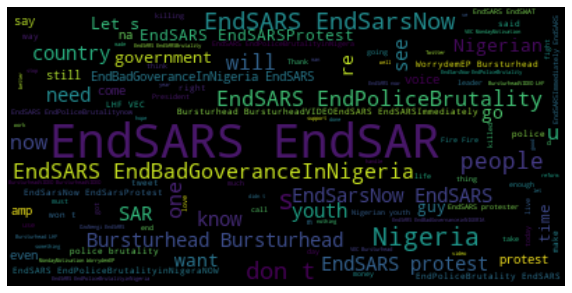

In [17]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_tweets)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

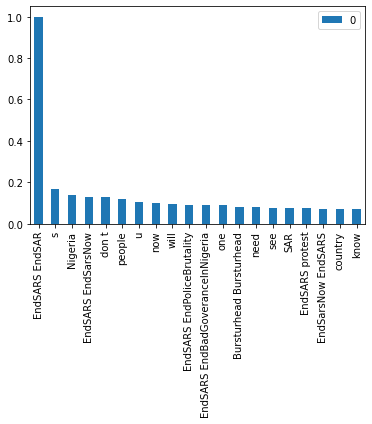

In [18]:
endsars_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
endsars_freq = endsars_freq.head(20)
endsars_freq.plot.bar()

In [19]:
endsars['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title='Overall Sentiment Distribution')

In [22]:
endsars_popular = endsars[endsars['retweet'] >= 1000]
endsars_popular['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',yTitle='Count', title = 'Sentiment Distribution for <br> popular tweets (Above 1000 retweets)')

In [24]:
endsars_popular = endsars[endsars['likes'] >= 1000]
endsars_popular['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',yTitle='Count', title = 'Sentiment Distribution for <br> popular tweets (Above 1000 likes)')

In [26]:
endsars_popular = endsars[endsars['verified'] == True]
endsars_popular['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',yTitle='Count', title = 'Sentiment Distribution from verified users')

In [27]:
endsars_popular = endsars[endsars['verified'] == False]
endsars_popular['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',yTitle='Count', title = 'Sentiment Distribution from non verified users')